# This is a showcase of fmath

We'll start with a setup

In [1]:
%pip install matplotlib numpy ipympl -q --user
%matplotlib widget

DEPRECATION: Loading egg at /opt/hostedtoolcache/Python/3.12.4/x64/lib/python3.12/site-packages/fmath-1.0.3-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Note: you may need to restart the kernel to use updated packages.

In [2]:
from matplotlib.pyplot import show, subplots
from ipywidgets import Output
from numpy import array
from fmath import pow as fpow, sqrt as fsqrt, log2 as flog2
from math import sqrt, log2
from timeit import timeit

In [3]:
def plot(evaluator, data, axe):
    diff = list(map(evaluator, data))
    data, diff = array(data), array(diff)
    axe.plot(data[:, 0], diff)
def plot_difference(f_func, func, data, axe): plot(lambda x: abs(f_func(*x) - func(*x)) / func(*x), data, axe)
def plot_both(f_time, time, data, axe): plot(lambda x: timeit(*time(*x), number=10) / timeit(*f_time(*x), number=10), data, axe)

Now we'll plot the error for `sqrt`, notice it's below 0.06

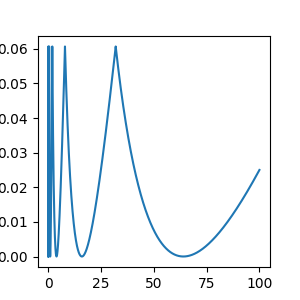

In [4]:
with Output():
    plot_difference(fsqrt, sqrt, [[x / 1000] for x in range(1, 100000)], subplots(figsize=(3, 3))[1])

And the error for `log2`

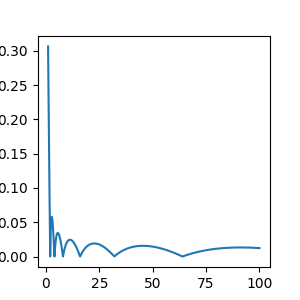

In [5]:
with Output():
    plot_difference(flog2, log2, [[x / 1000] for x in range(1001, 100000)], subplots(figsize=(3, 3))[1])

Next we'll plot the error for `pow` for numbers smaller than 1

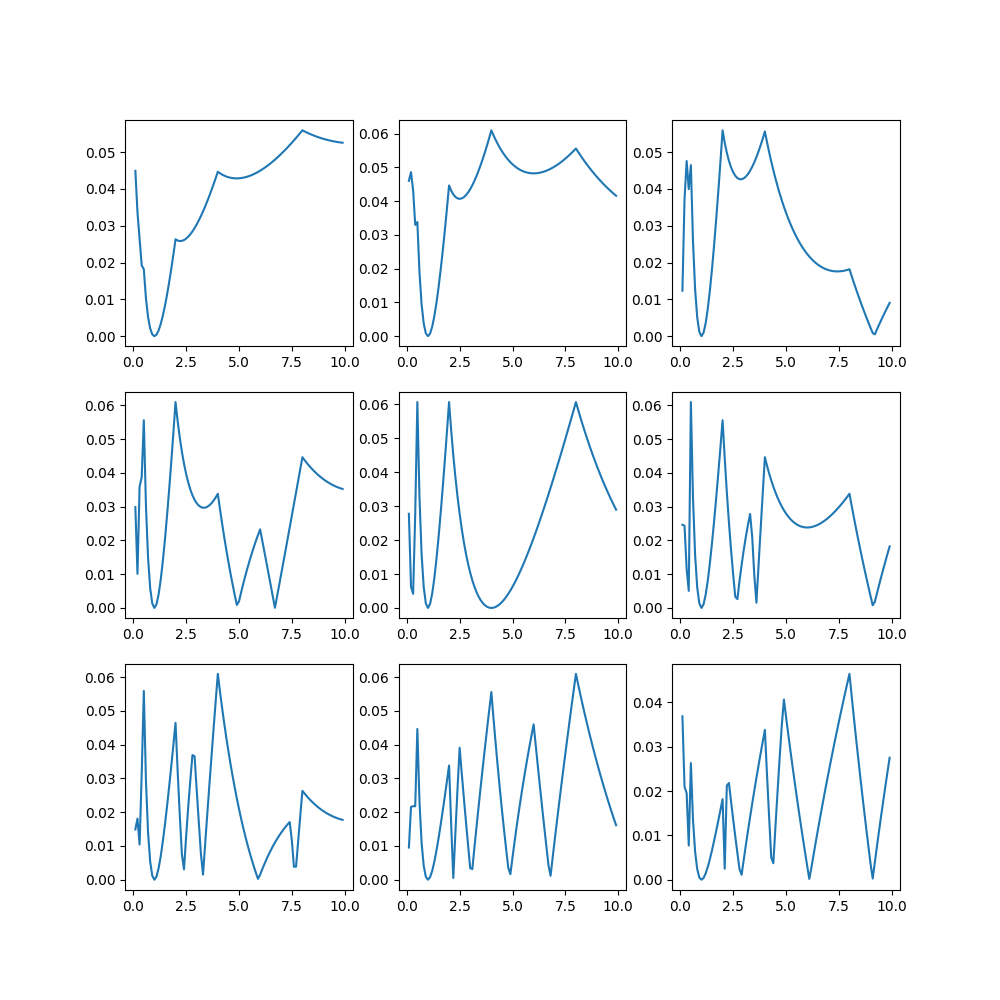

In [6]:
with Output():
    axes = subplots(3, 3, figsize=(10, 10))[1].flatten()
    for y in range(1, 10):
        plot_difference(fpow, pow, [[x / 10, y / 10] for x in range(1, 100)], axes[y - 1])

And for values bigger than 1

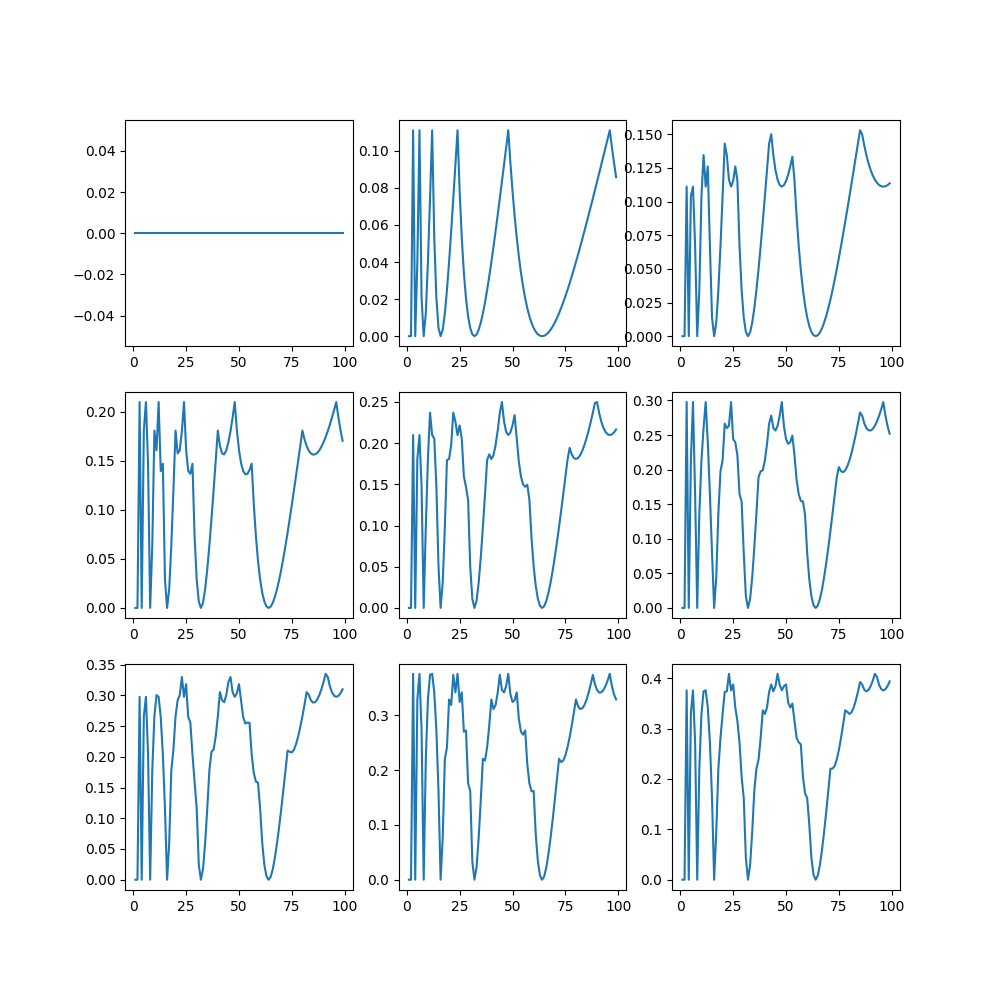

In [7]:
with Output():
    axes = subplots(3, 3, figsize=(10, 10))[1].flatten()
    for y in range(1, 10):
        plot_difference(fpow, pow, [[float(x), float(y)] for x in range(1, 100)], axes[y - 1])

We won't plot the error for `abs`, `min`, `max` and `sign` as we know it's always 0

Next, let's plot the speed gain using fmath for `sqrt`, `abs` and `sign`.

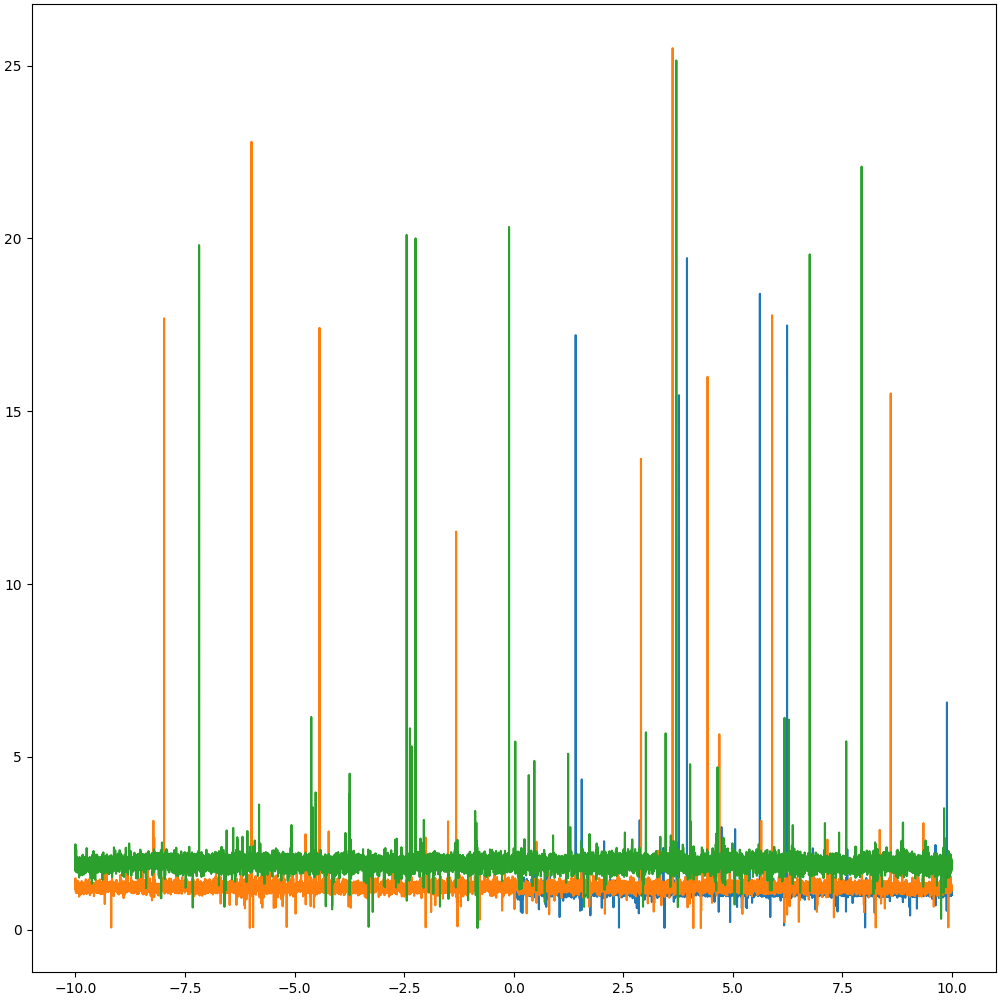

In [8]:
with Output():
    axe = subplots(constrained_layout=True, figsize=(10, 10))[1]
    plot_both(lambda x: [f'sqrt({x})', 'from fmath import sqrt'], lambda x: [f'sqrt({x})', 'from math import sqrt'], [[x / 1000] for x in range(1, 10000)], axe)
    plot_both(lambda x: [f'abs({x})', 'from fmath import abs'], lambda x: [f'abs({x})'], [[x / 1000] for x in range(-10000, 10000)], axe)
    plot_both(lambda x: [f'sign({x})', 'from fmath import sign'], lambda x: [f'float({x})>=0'], [[x / 1000] for x in range(-10000, 10000)], axe)

The speed gain for `min` and `max`

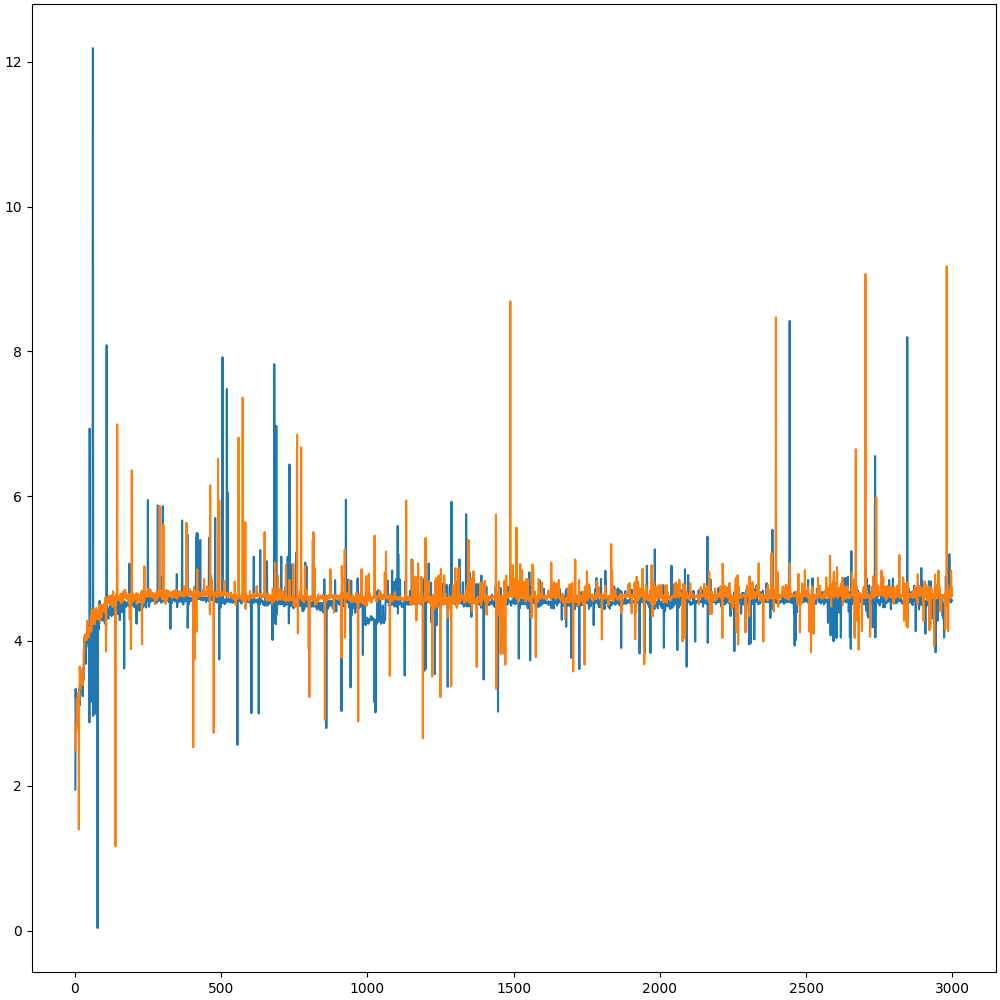

In [9]:
from random import uniform
def rand_args(length): return ",".join(str(uniform(-1000, 1000)) for _ in range(length))
with Output():
    axe = subplots(constrained_layout=True, figsize=(10, 10))[1]
    plot_both(lambda x: [f'min({rand_args(x)})', 'from fmath import min'], lambda x: [f'min({rand_args(x)})'], [[x] for x in range(2, 3000)], axe)
    plot_both(lambda x: [f'max({rand_args(x)})', 'from fmath import max'], lambda x: [f'max({rand_args(x)})'], [[x] for x in range(2, 3000)], axe)

And the speed gain for `log2`

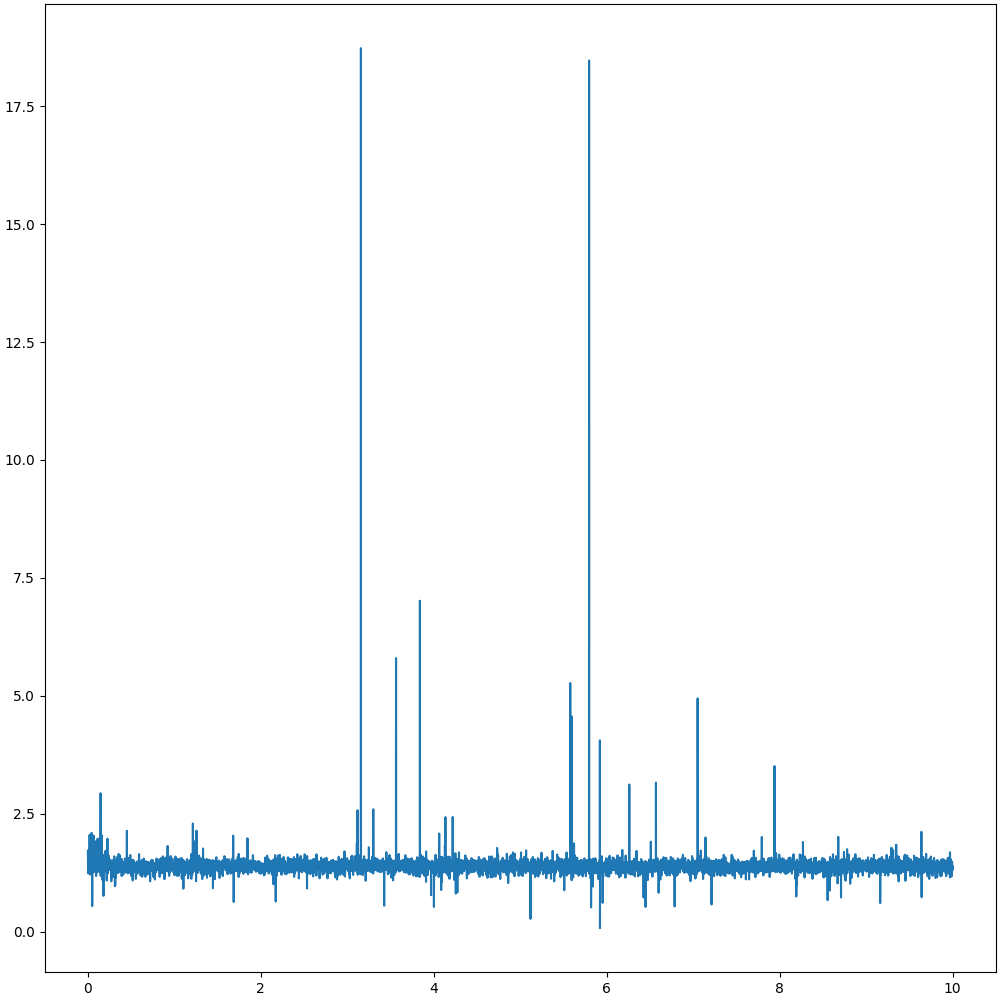

In [10]:
with Output():
    axe = subplots(constrained_layout=True, figsize=(10, 10))[1]
    plot_both(lambda x: [f'log2({x})', 'from fmath import log2'], lambda x: [f'log2({x})', 'from math import log2'], [[x / 1000] for x in range(1, 10000)], axe)

And lastly, the speed gain for `pow`.

First we'll plot it for values smaller than 1.

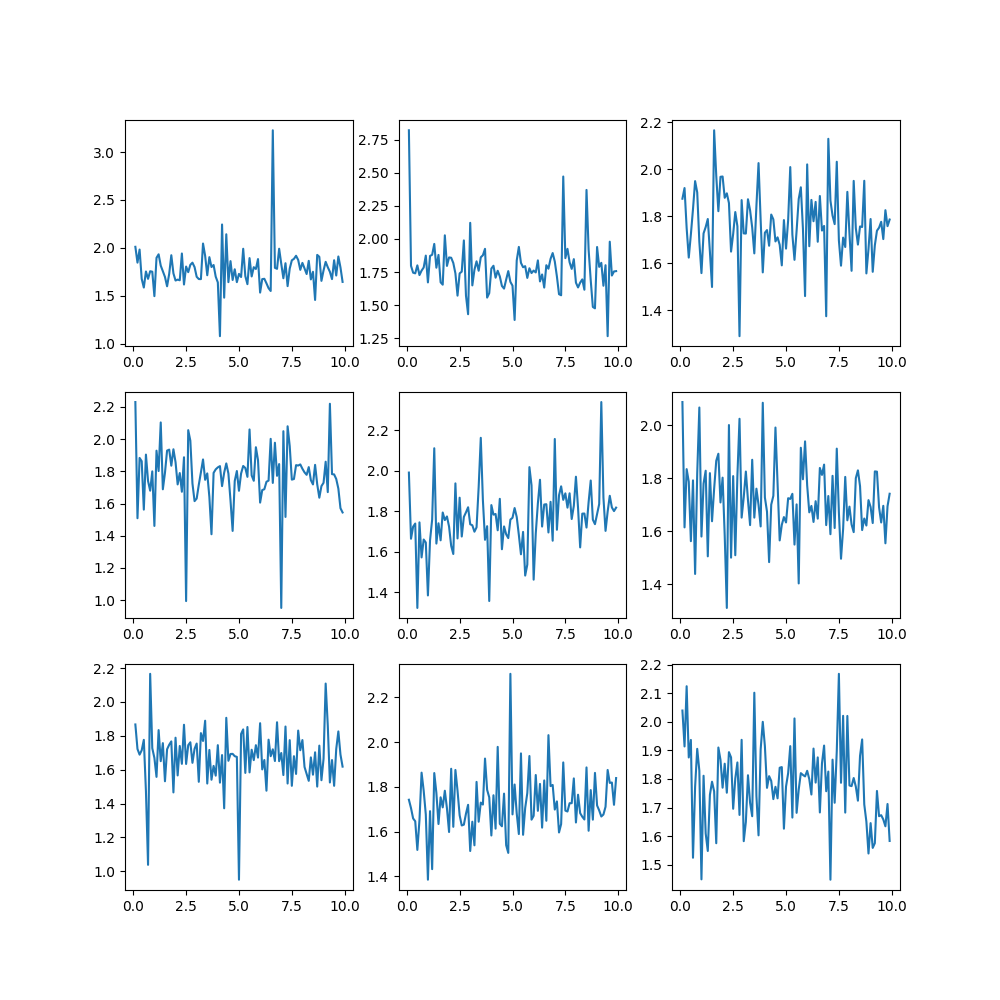

In [11]:
with Output():
    axes = subplots(3, 3, figsize=(10, 10))[1].flatten()
    for y in range(1, 10):
        plot_both(lambda x, y: [f'pow({x}, {y})', 'from fmath import pow'], lambda x, y: [f'pow({x}, {y})'], [[x / 10, y / 10] for x in range(1, 100)], axes[y - 1])

And for values bigger than 1.

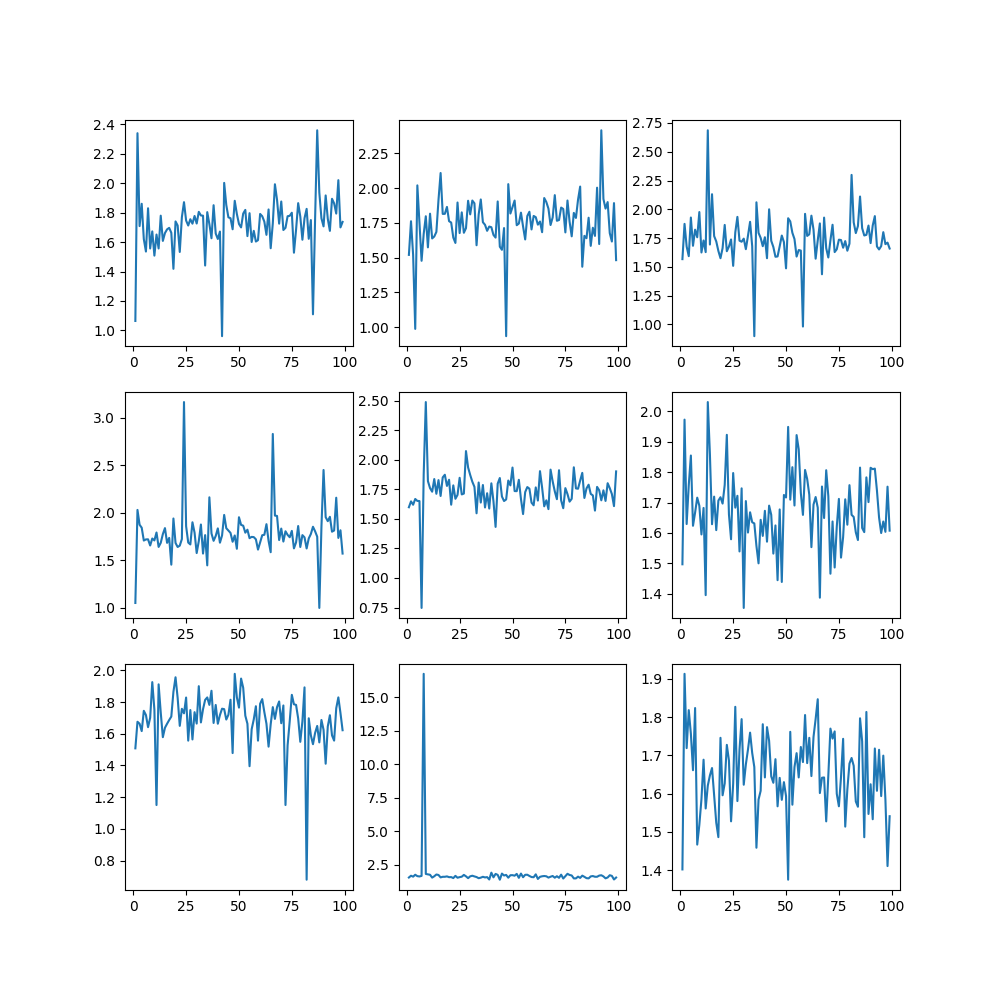

In [12]:
with Output():
    axes = subplots(3, 3, figsize=(10, 10))[1].flatten()
    for y in range(1, 10):
        plot_both(lambda x, y: [f'pow({x}, {y})', 'from fmath import pow'], lambda x, y: [f'pow({x}, {y})'], [[float(x), float(y)] for x in range(1, 100)], axes[y - 1])

You can see it's **2 times** faster!